In [21]:
from data import MNIST
from mmdew_adapter import MMDEWAdapter
from mmdew.mmd import MMD
import matplotlib.pyplot as plt

In [22]:
from sklearn import preprocessing
import numpy as np
def preprocess(x):
    return preprocessing.minmax_scale(x)
mnist = MNIST(preprocess=preprocess)

In [23]:

cps = mnist._change_points
true_cps = [i for i, x in enumerate(cps) if x]
fst_cps = true_cps[0]
snd_cps = true_cps[1]
thrd_cps = true_cps[2]
fst_cps
print(true_cps)

[7141, 14017, 20841, 27831, 34734, 41692, 48985, 55810, 63687]


I have been getting weird values for my mmd between different classes. Lets just try it with conventional mmd

In [24]:
mymmd = MMD(1)
X = []
Y = []
for i in range(snd_cps):
    if i < fst_cps:
        next_sample, _, is_change = mnist.next_sample()
        X.append(next_sample)
    else:
        next_sample, _, is_change = mnist.next_sample()
        Y.append(next_sample)
X = np.array(X).reshape(fst_cps, -1)
Y = np.array(Y).reshape(snd_cps - fst_cps, -1)

print(mymmd.mmd(X,Y))
print(len(X))
print(len(Y))

0.00028548701497014363
7141
6876


## Sample of first dataset

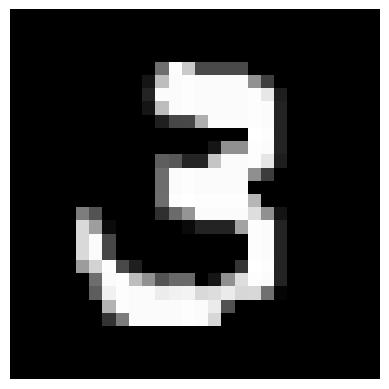

In [25]:
image = X[0].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis numbers
plt.show()

## Sample of second dataset

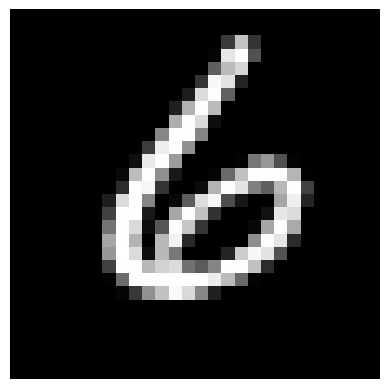

In [26]:
image = Y[0].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis numbers
plt.show()